In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download vora1011/ipl-2008-to-2021-all-match-dataset
!unzip ipl-2008-to-2021-all-match-dataset.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/1.58M [00:00<?, ?B/s]
100% 1.58M/1.58M [00:00<00:00, 144MB/s]
Archive:  ipl-2008-to-2021-all-match-dataset.zip
  inflating: IPL_Ball_by_Ball_2008_2022.csv  
  inflating: IPL_Matches_2008_2022.csv  


In [2]:
import pandas as pd

df=pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
df.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

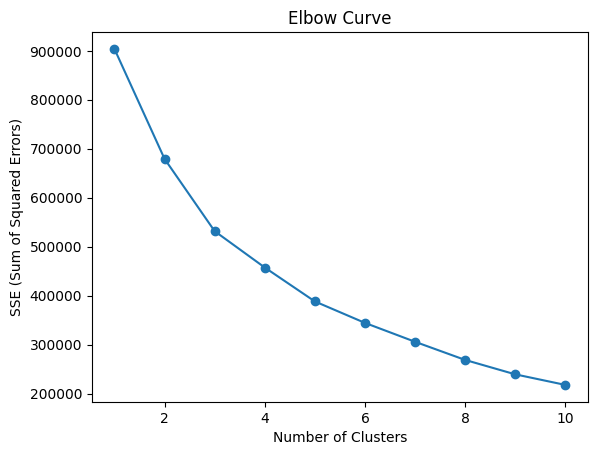

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
Cluster 1: [1.         9.37724483 3.62422517 0.66614583]
Cluster 2: [2.00263499 8.91804089 3.60993391 0.65612305]
Cluster 3: [1.47907855 9.33841407 3.63195276 4.56292395]
Cluster 1: 97279 instances
Cluster 2: 91082 instances
Cluster 3: 37593 instances


In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select the features for clustering
features = ['innings', 'overs', 'ballnumber', 'total_run']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Curve')
plt.show()

# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the dataset
df['cluster'] = labels

# Print the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}: {center}")

# Print the number of instances in each cluster
cluster_counts = np.bincount(labels)
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i+1}: {count} instances")
